In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# x_train.shape


In [4]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [68]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [69]:
y_test[:4]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

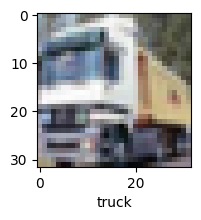

In [75]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def plot(x,y,index):
    # y.reshape(-1,)
    plt.figure(figsize=(10,2))
    plt.imshow(x[index])
    plt.xlabel(labels[np.argmax(y[index])])

plot(x_train,y_train,1)

In [34]:
x_train = x_train/225
x_test = x_test/225

In [43]:
model = Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10,batch_size=64)

D:\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3114 - loss: 3.4894
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5433 - loss: 1.2903
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6122 - loss: 1.1016
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6547 - loss: 0.9885
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6826 - loss: 0.9067
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7113 - loss: 0.8322
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7276 - loss: 0.7836
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7439 - loss: 0.7282
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7617 - loss: 0.6752
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7806 - loss: 0.6249


In [45]:
accuracy = model.evaluate(x_test,y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6551 - loss: 1.1292


In [80]:
y_pred = model.predict(x_test)
y_pred[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[5.9997919e-03, 1.3250495e-04, 4.2110612e-03, 8.9400357e-01,
        3.4801762e-03, 2.1950843e-02, 6.2797189e-02, 2.0618052e-03,
        5.3455965e-03, 1.7542367e-05],
       [4.7024188e-04, 4.5418316e-01, 6.3753454e-08, 2.0216173e-06,
        4.5468491e-09, 5.6057949e-08, 2.6973130e-09, 2.3239753e-08,
        5.4127586e-01, 4.0685101e-03]], dtype=float32)

In [79]:
y_label = [np.argmax(i) for i in y_pred]
y_label[:3]

[np.int64(3), np.int64(8), np.int64(9)]

In [70]:
y_test[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

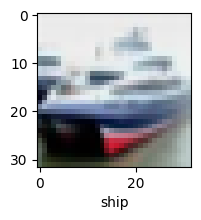

In [77]:
plot(x_test,y_test,1)